In [3]:
import matplotlib.pyplot as plt
import networkx          as nx
import sys
import scipy

In [15]:
class DiGraph_Simulations:

    def __init__(self):
        self.dg = nx.DiGraph()
        self.E  = []
        self.V  = 0
        self.nE = 0
        self.pl = []

    def Edge_List(self):
        self.E = [(u, v) for (u, v, w) in self.dg.edges(data=True)]

    def Parse_List(self):
        self.pl = [(u, v, w) for (u, v, w) in self.dg.edges(data=True)]

    def create_DiGraph(self, weighted_edges_arr):
        self.dg.add_weighted_edges_from(weighted_edges_arr)
        self.Edge_List()
        self.pl = [(u-1, v-1, w) for (u, v, w) in weighted_edges_arr]
        self.V  = self.dg.number_of_nodes()
        self.nE = self.dg.number_of_edges()

    def draw_DiGraph(self):
        pos = nx.spring_layout( self.dg, seed=7) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E, width=4, alpha=0.5, edge_color="g")
        nx.draw_networkx_labels(self.dg, pos, font_size=20, font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()
    #def print_vertices(self):
    #    print(self.V)
    #def print_parse_list(self):
    #    print(self.pl)
    def Kruskals_find(self,parent, i): # search function
        if parent[i] == i:
            return i
        return self.Kruskals_find(parent, parent[i])

    def apply_UNION(self, parent, rank, x, y):
        x_root = self.Kruskals_find(parent, x)
        y_root = self.Kruskals_find(parent, y)

        if   rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root]  += 1

    def Kruskals_MST(self):
        result = []
        i, e = 0, 0
        self.pl  = sorted(self.pl, key=lambda item: item[2])
        parent = []
        rank   = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.pl[i]
            i = i + 1
            x = self.Kruskals_find(parent, u)
            y = self.Kruskals_find(parent, v)
            if x != y:
                e += 1
                result.append([u, v, w])
                self.apply_UNION(parent, rank, x, y)

        for u, v, weight in result:
            print("%d - %d: %.2f" % (u+1, v+1, weight))


        pos = nx.spring_layout( self.dg, seed=7) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E, width=4, alpha=0.5, edge_color="g")
        nx.draw_networkx_edges( self.dg, pos, edgelist=[(u+1,v+1) for (u,v,w) in result], width=4, alpha=0.5, edge_color="b")
        nx.draw_networkx_labels(self.dg, pos, font_size=20, font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()  

    def generate_matrix(self):
        
        self.adj_matrix = [[0 for j in range(self.V)]
                              for i in range(self.V)]
        for i in range(self.nE):
            u, v, w = self.pl[i]
            self.adj_matrix[u][v] = w

    def Prims_MST(self):
        selected = [0 for i in range(self.V)]
        no_edge  = 0
        result   = []

        selected[0] = True
        while(no_edge < self.V - 1):
            minimum = int(sys.maxsize)
            x = 0
            y = 0
            for i in range(self.V):
                if selected[i]:
                    for j in range(self.V):
                        if ((not selected[j]) and self.adj_matrix[i][j]):
                            if minimum > self.adj_matrix[i][j]:
                                minimum = self.adj_matrix[i][j]
                                x = i
                                y = j
            if x != y: 
                result.append([x, y, self.adj_matrix[x][y]])
                #print(str(x+1)+"->"+str(y+1)+" : "+str(self.adj_matrix[x][y])+"\n")
                selected[y] = True
            no_edge += 1
        
        pos = nx.spring_layout( self.dg, seed=7) 
        nx.draw_networkx_nodes( self.dg, pos, node_size=700)
        nx.draw_networkx_edges( self.dg, pos, edgelist=self.E, width=4, alpha=0.5, edge_color="g")
        nx.draw_networkx_edges( self.dg, pos, edgelist=[(u+1,v+1) for (u,v,w) in result], width=4, alpha=0.5, edge_color="orange")
        nx.draw_networkx_labels(self.dg, pos, font_size=20, font_family="sans-serif")

        ax = plt.gca()
        ax.margins(0.08)    
        plt.axis("off")
        plt.tight_layout()
        plt.show()  

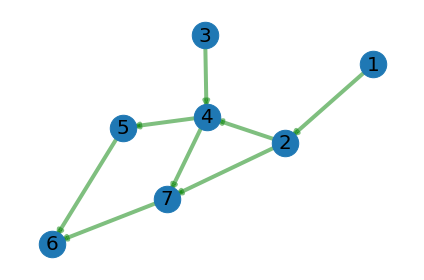

4 - 7: 0.25
1 - 2: 0.50
2 - 7: 0.50
3 - 4: 0.50
4 - 5: 0.50
5 - 6: 0.50


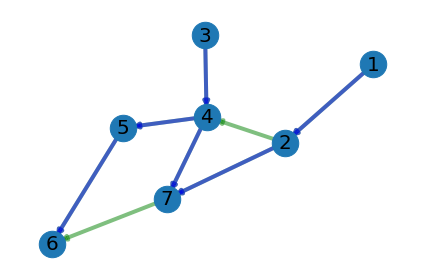

8
[[0, 0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0.5, 0, 0, 0.5], [0, 0, 0, 0.5, 0, 0, 0], [0, 0, 0, 0, 0.5, 0, 0.25], [0, 0, 0, 0, 0, 0.5, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.75, 0]]


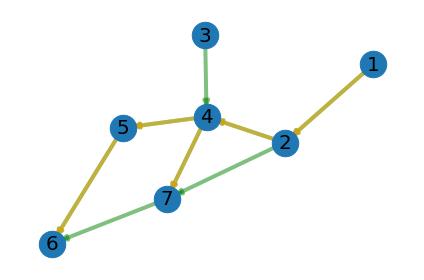

In [16]:
input_list = [(1,2,0.5),(2,7,0.5),(2,4,0.5),(4,7,0.25),
              (3,4,0.5),(4,5,0.5),(7,6,0.75),(5,6,0.5)]

X = DiGraph_Simulations()
X.create_DiGraph(input_list)
X.draw_DiGraph()
X.Kruskals_MST()
print(X.nE)
X.generate_matrix()
print(X.adj_matrix)
X.Prims_MST()
